# **Data Visualization II (Visualizing COVID-19 Trends):**
------------------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
from datetime import datetime


In [7]:
covid_df = pd.read_csv('covid_19_india.csv')
vaccine_df = pd.read_csv('covid_vaccine_statewise.csv')


In [4]:
covid_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0
5,6.0,2020-02-04,6:00 PM,Kerala,3,0,0.0,0.0,3.0
6,7.0,2020-02-05,6:00 PM,Kerala,3,0,0.0,0.0,3.0
7,8.0,2020-02-06,6:00 PM,Kerala,3,0,0.0,0.0,3.0
8,9.0,2020-02-07,6:00 PM,Kerala,3,0,0.0,0.0,3.0
9,10.0,2020-02-08,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [5]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   Time                      15086 non-null  object 
 3   State/UnionTerritory      15086 non-null  object 
 4   ConfirmedIndianNational   15086 non-null  object 
 5   ConfirmedForeignNational  15086 non-null  object 
 6   Cured                     15086 non-null  float64
 7   Deaths                    15086 non-null  float64
 8   Confirmed                 15086 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [6]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,15086.000000,1.508600e+04,15086.000000,1.508600e+04
mean,7543.500000,1.747937e+05,2721.084449,1.942820e+05
std,4355.097416,3.648330e+05,7182.672358,4.095184e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3772.250000,1.685000e+03,12.000000,2.935500e+03
50%,7543.500000,1.964700e+04,364.000000,2.608150e+04
75%,11314.750000,2.087552e+05,2170.000000,2.216012e+05
max,15086.000000,4.927480e+06,83777.000000,5.433506e+06


In [8]:
vaccine_df.head(10)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0


In [9]:
# Drop the columns that are not required
covid_df.drop(['Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1, inplace=True) 

In [14]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0


In [13]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format='%Y-%m-%d')

In [17]:
covid_df.isnull().sum()

Date                    28
State/UnionTerritory    28
Cured                   28
Deaths                  28
Confirmed               28
Active_cases            28
dtype: int64

In [16]:
# Active cases 
covid_df['Active_cases'] = covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'])
covid_df.head()


,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
0,2020-01-30,Kerala,0.0,0.0,1.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0,3.0


In [18]:
statewise = pd.pivot_table(covid_df,
                           values=['Confirmed', 'Deaths', 'Cured', 'Active_cases'], 
                           index='State/UnionTerritory',
                           aggfunc='max')

In [19]:
statewise['Recovery Rate'] = statewise['Cured'] * 100 / statewise['Confirmed']

In [20]:
statewise['Mortality Rate'] = statewise['Deaths']  * 100 / statewise['Confirmed']

In [21]:
statewise = statewise.sort_values(by='Confirmed', ascending=False)

In [22]:
statewise.style.background_gradient(cmap='cubehelix')

,Active_cases,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,,
Maharashtra,701614.000000,5433506.000000,4927480.000000,83777.000000,90.686934,1.541859
Karnataka,605515.000000,2272374.000000,1674487.000000,22838.000000,73.688882,1.005028
Kerala,445692.000000,2200706.000000,1846105.000000,6612.000000,83.886944,0.300449
Tamil Nadu,242929.000000,1664350.000000,1403052.000000,18369.000000,84.300297,1.103674
Uttar Pradesh,310783.000000,1637663.000000,1483249.000000,18072.000000,90.571076,1.103524
Andhra Pradesh,211554.000000,1475372.000000,1254291.000000,9580.000000,85.015237,0.649328
Delhi,103424.000000,1402873.000000,1329899.000000,22111.000000,94.798246,1.576123
West Bengal,131948.000000,1171861.000000,1026492.000000,13576.000000,87.595030,1.158499
Chhattisgarh,131245.000000,925531.000000,823113.000000,12036.000000,88.934136,1.300443


In [25]:
# Top 10 active cases states 

top_10_active_cases = covid_df.groupby(by = 'State/UnionTerritory').max()[['Active_cases', 'Date']].sort_values(by=['Active_cases'], ascending=False).reset_index().head(10)
top_10_active_cases

,State/UnionTerritory,Active_cases,Date
0,Maharashtra,701614.0,2021-05-19
1,Karnataka,605515.0,2021-05-19
2,Kerala,445692.0,2021-05-19
3,Uttar Pradesh,310783.0,2021-05-19
4,Tamil Nadu,242929.0,2021-05-19
5,Rajasthan,212753.0,2021-05-19
6,Andhra Pradesh,211554.0,2021-05-19
7,Gujarat,148297.0,2021-05-19
8,West Bengal,131948.0,2021-05-19
9,Chhattisgarh,131245.0,2021-05-19


C:\Users\Iqras\AppData\Local\Temp\ipykernel_5996\2898742745.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10_active_cases.iloc[:10], x='State/UnionTerritory', y='Active_cases',


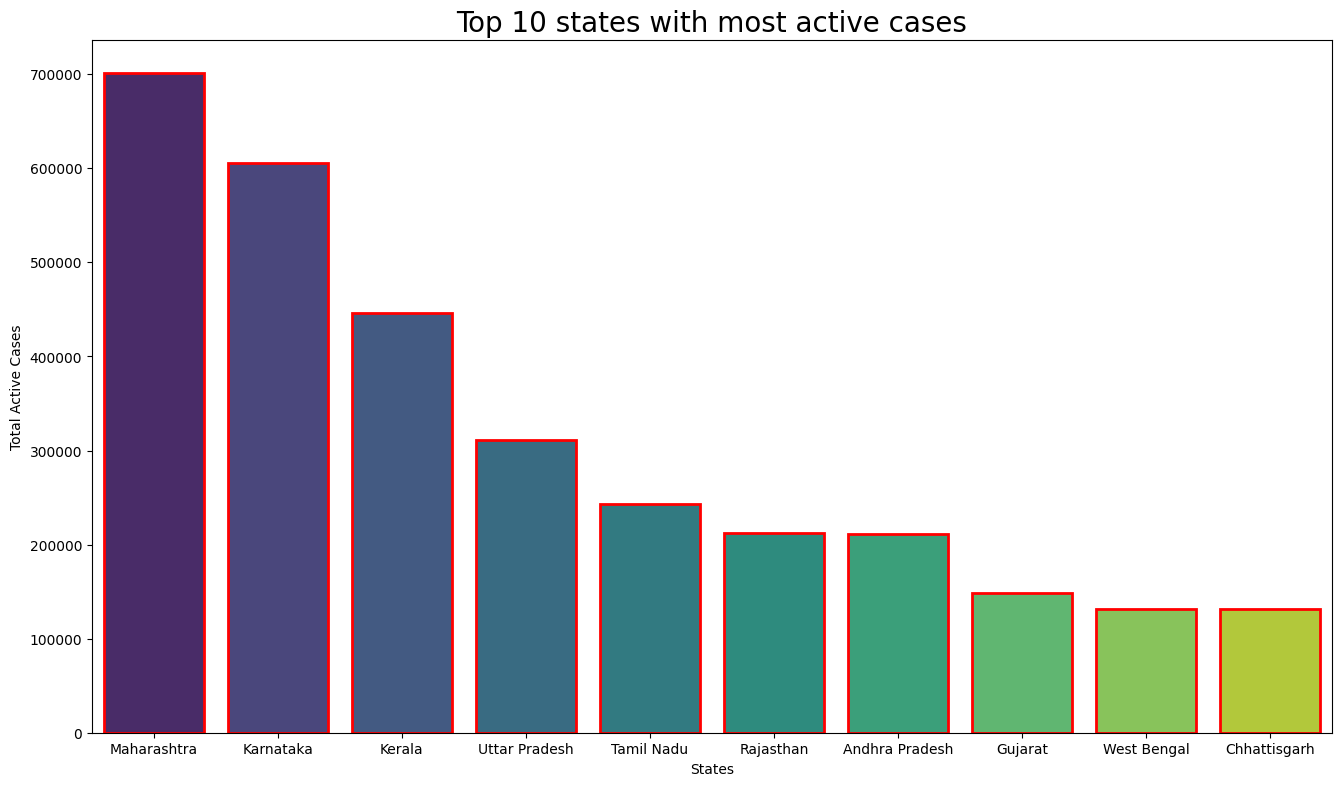

In [28]:
fig= plt.figure(figsize=(16, 9))
plt.title("Top 10 states with most active cases", size= 20)
ax = sns.barplot(data=top_10_active_cases.iloc[:10], x='State/UnionTerritory', y='Active_cases',
                 palette='viridis', linewidth= 2, edgecolor='red')
plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show()

In [29]:
# Top states With highest deaths 

top_10_deaths = covid_df.groupby(by = 'State/UnionTerritory').max()[['Deaths', 'Date']].sort_values(by=['Deaths'], ascending=False).reset_index().head(10)
top_10_deaths

,State/UnionTerritory,Deaths,Date
0,Maharashtra,83777.0,2021-05-19
1,Karnataka,22838.0,2021-05-19
2,Delhi,22111.0,2021-05-19
3,Tamil Nadu,18369.0,2021-05-19
4,Uttar Pradesh,18072.0,2021-05-19
5,West Bengal,13576.0,2021-05-19
6,Punjab,12317.0,2021-05-19
7,Chhattisgarh,12036.0,2021-05-19
8,Andhra Pradesh,9580.0,2021-05-19
9,Gujarat,9269.0,2021-05-19


C:\Users\Iqras\AppData\Local\Temp\ipykernel_5996\819807903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10_deaths.iloc[:12], x='State/UnionTerritory', y='Deaths',


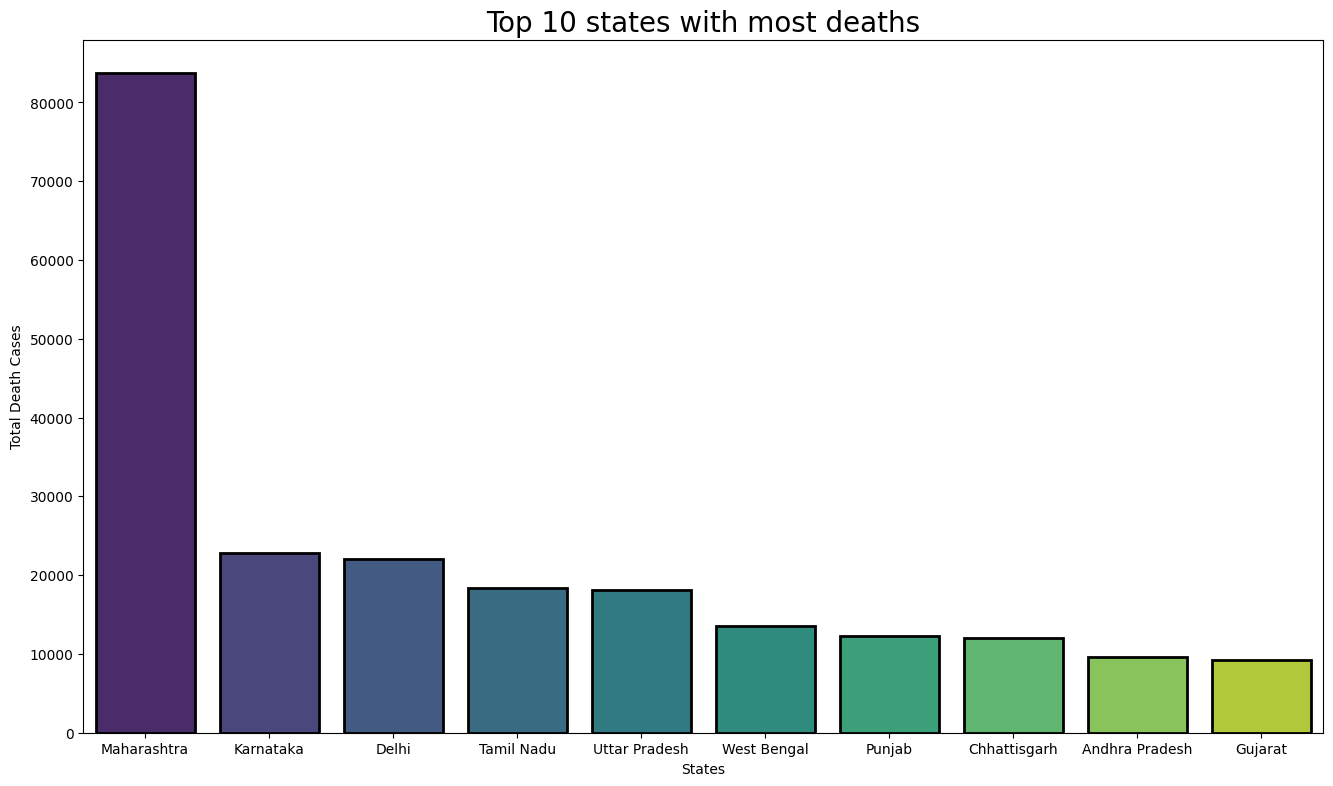

In [30]:
fig= plt.figure(figsize=(16, 9))
plt.title("Top 10 states with most deaths", size= 20)
ax = sns.barplot(data=top_10_deaths.iloc[:12], x='State/UnionTerritory', y='Deaths',
                 palette='viridis', linewidth= 2, edgecolor='black')
plt.xlabel("States")
plt.ylabel("Total Death Cases")
plt.show()

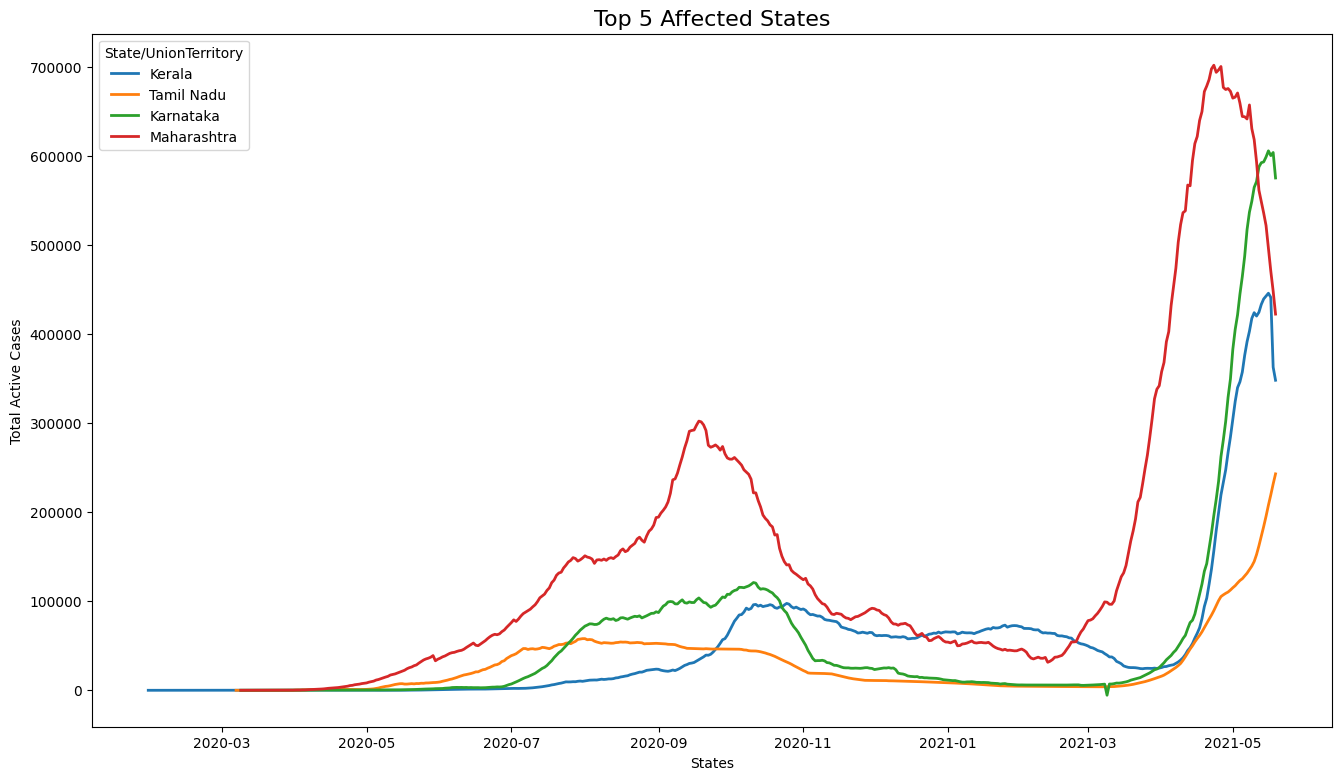

In [32]:
# Growth trends 

fig= plt.figure(figsize=(16, 9))
ax = sns.lineplot(data=covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra', 'Karnataka', 'Kerala', 'Tamil Nadu','Uttar Paradesh'])], 
                  x='Date', y='Active_cases', hue='State/UnionTerritory', linewidth= 2)
ax.set_title("Top 5 Affected States", size= 16)
plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show()

In [35]:
vaccine_df.head(3)

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0


In [34]:
vaccine_df.rename(columns={'Updated On': 'Vaccine_date'}, inplace=True)

In [36]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [37]:
vaccine_df.isnull().sum()

Vaccine_date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [38]:
vaccine_df.columns

Index(['Vaccine_date', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated'],
      dtype='object')

In [39]:
vaccination= vaccine_df.drop(['Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)'], axis=1)

In [40]:
vaccine_df.head(2)

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0


In [50]:
import warnings as w
w.filterwarnings('ignore')
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


In [52]:
# Male vs Female vaccination 

male= vaccination["Male (Doses Administered)"].sum()
female= vaccination["Female (Doses Administered)"].sum()
px.pie(names= ["Male", "Female"],  values= [male, female],title="Male and Femae Vaccination")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['Male', 'Female'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([2.70099840e+10, 2.36395545e+10])}],
    'layout': {'legend': {'tracegroupgap': 0}, 'template': '...', 'title': {'text': 'Male and Femae Vaccination'}}
})

In [53]:
# Remove rows if state = india 

vaccine = vaccine_df[vaccine_df['State']!='India']
vaccine.head(2)


,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0


In [56]:
vaccine.rename(columns= {'Total Individuals Vaccinated' : 'Total'}, inplace=True)
vaccine.head(2)

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0


In [57]:
# Most vaccinated states 

max_vac = vaccine.groupby(by = 'State')['Total'].sum().to_frame('Total')
max_vac = max_vac.sort_values(by='Total', ascending=False)[:5]
max_vac

,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


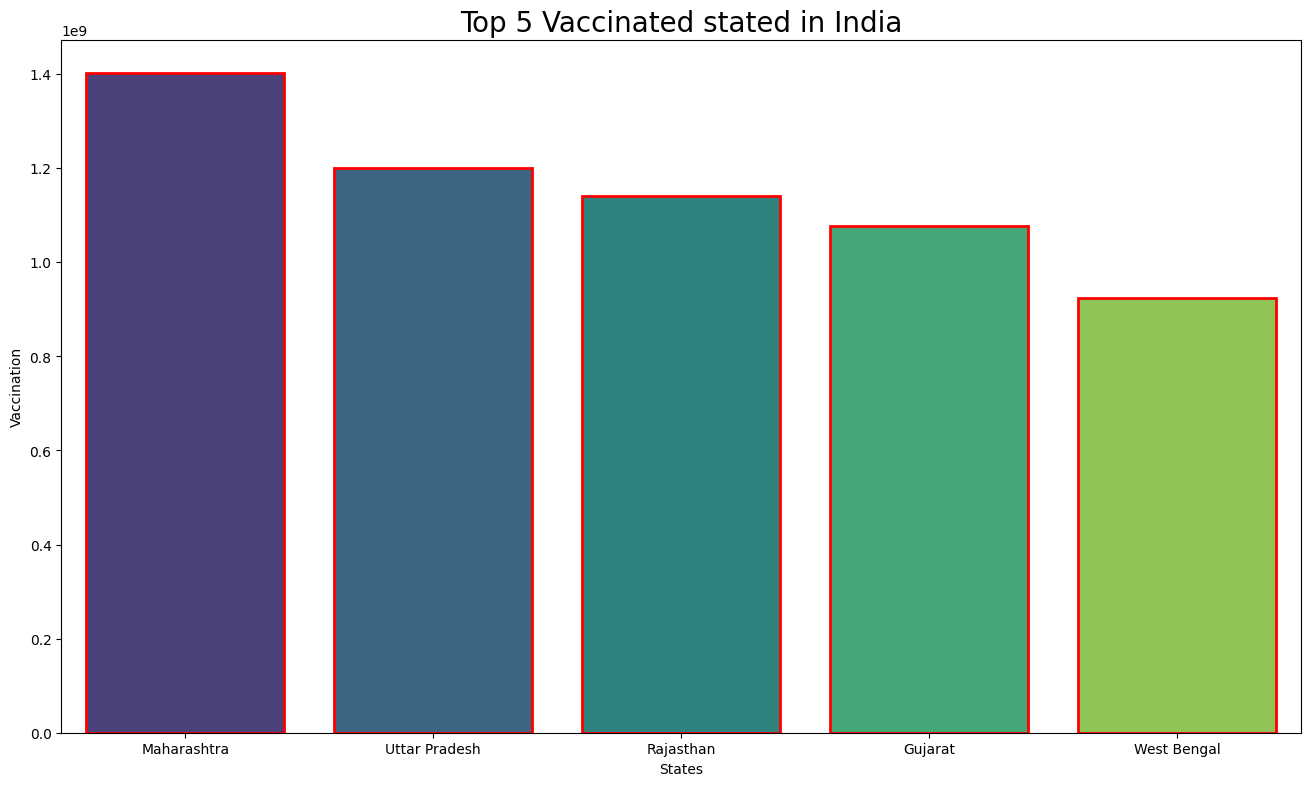

In [58]:
fig= plt.figure(figsize=(16, 9))
plt.title("Top 5 Vaccinated stated in India", size= 20)
ax = sns.barplot(data=max_vac.iloc[:10], x=max_vac.index, y=max_vac.Total,
                 palette='viridis', linewidth= 2, edgecolor='red')
plt.xlabel("States")
plt.ylabel("Vaccination")
plt.show()